<h1 style=color:red> Simple model to predict result of a movie based on Revenue ,Votes ,Rating 
and metascore using Decision trees</h1>

<h2 style=color:blue> Acquire data</h2>

  ><h3 style=color:cyan> Identify data

<h3>As we are dealing with movie data base ,download movie data set from Kaggle IMDB movie data base.

  > <h3 style=color:cyan>Retrieve data

In [144]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

In [145]:
im=pd.read_csv("imdb.csv")

> <h3 style=color:cyan> Query data

In [146]:
im.count()

Rank                  1000
Title                 1000
Genre                 1000
Description           1000
Director              1000
Actors                1000
Year                  1000
Runtime (Minutes)     1000
Rating                1000
Votes                 1000
Revenue (Millions)     872
Metascore              936
dtype: int64

In [147]:
im.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [148]:
im.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

<h2 style=color:blue> Prepare data

> <h3 style=color:cyan> Pre processing data(Clean,Integrate,Package)

In [149]:
im.isnull().any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [150]:
im.fillna(0,inplace=True)

In [151]:
def avgg(rating,metascore):
    if(metascore==0):
        return (rating*10)
    else:
        return metascore

In [152]:
im['Metascore']=im.apply(lambda row: avgg(row['Rating'],row['Metascore']),axis=1)

In [153]:
im.sort_values(['Votes'],ascending=[1])

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
478,479,Paint It Black,Drama,A young woman attempts to deal with the death ...,Amber Tamblyn,"Alia Shawkat, Nancy Kwan, Annabelle Attanasio,...",2016,96,8.3,61,0.00,71.0
293,294,The Exception,Drama,A German soldier tries to determine if the Dut...,David Leveaux,"Lily James, Jai Courtney, Christopher Plummer,...",2016,107,7.7,96,0.00,77.0
393,394,Whisky Galore,"Comedy,Romance",Scottish islanders try to plunder cases of whi...,Gillies MacKinnon,"Tim Pigott-Smith, Naomi Battrick, Ellie Kendri...",2016,98,5.0,102,0.00,43.0
337,338,Tracktown,"Drama,Sport","A young, talented, and lonely long-distance ru...",Alexi Pappas,"Alexi Pappas, Chase Offerle, Rachel Dratch, An...",2016,88,5.9,115,0.00,64.0
416,417,The Headhunter's Calling,Drama,A headhunter whose life revolves around closin...,Mark Williams,"Alison Brie, Gerard Butler, Willem Dafoe, Gret...",2016,108,6.9,164,0.00,85.0
647,648,Tall Men,"Fantasy,Horror,Thriller",A challenged man is stalked by tall phantoms i...,Jonathan Holbrook,"Dan Crisafulli, Kay Whitney, Richard Garcia, P...",2016,133,3.2,173,0.00,57.0
250,251,Bonjour Anne,"Comedy,Drama,Romance",Anne is at a crossroads in her life. Long marr...,Eleanor Coppola,"Diane Lane, Alec Baldwin, Arnaud Viard, Linda ...",2016,92,4.9,178,0.32,50.0
538,539,True Crimes,"Crime,Drama,Thriller",A murder investigation of a slain business man...,Alexandros Avranas,"Jim Carrey, Charlotte Gainsbourg, Marton Csoka...",2016,92,7.3,198,0.00,43.0
890,891,The Intent,"Crime,Drama",Gunz (Dylan Duffus) is thrust into a world of ...,Femi Oyeniran,"Dylan Duffus, Scorcher,Shone Romulus, Jade Asha",2016,104,3.5,202,0.00,59.0
439,440,Folk Hero & Funny Guy,Comedy,A successful singer-songwriter hatches a plan ...,Jeff Grace,"Alex Karpovsky, Wyatt Russell, Meredith Hagner...",2016,88,5.6,220,0.00,63.0


In [154]:
l={ j for i in im['Genre'].str.split(',').tolist() for j in i }
l

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [155]:
im['Genre']=im['Genre'].str.split(',').tolist()

In [156]:
def avg1(rating,votes,revenue,genre,dd):
    su=0
    if(revenue==0):
        for i in genre:
            if i in dd:
                su+=dd[i]
        return su
    else:
        return revenue

In [157]:
dic={'Comedy':50, 'Action':50, 'Adventure':50,'Sci-Fi':50,'Drama':30,'Sport':40,'Thriller':35,'History':30,'Musical':20,'Romance':30,'Music':20,'Biography':30,'Horror':35,'Fantasy':60,'Crime':50,'Mystery':50,'War':70,'Animation':70,'Family':40}

In [158]:
im['Revenue (Millions)']=im.apply(lambda row:avg1(row['Rating'],row['Votes'],row['Revenue (Millions)'],row['Genre'],dic) ,axis =1 )

In [159]:
im.isnull().any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool

In [160]:
im

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"[Action, Adventure, Fantasy]",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"[Comedy, Drama, Music]",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,[Comedy],A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,50.00,71.0
8,9,The Lost City of Z,"[Action, Adventure, Biography]","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"[Adventure, Drama, Romance]",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


> <h3 style=color:cyan> Explore data(Understand type of data visually)

In [161]:
rat=im['Rating']

In [162]:
vot=im['Votes']

In [163]:
rev=im['Revenue (Millions)']

In [164]:
met=im['Metascore']

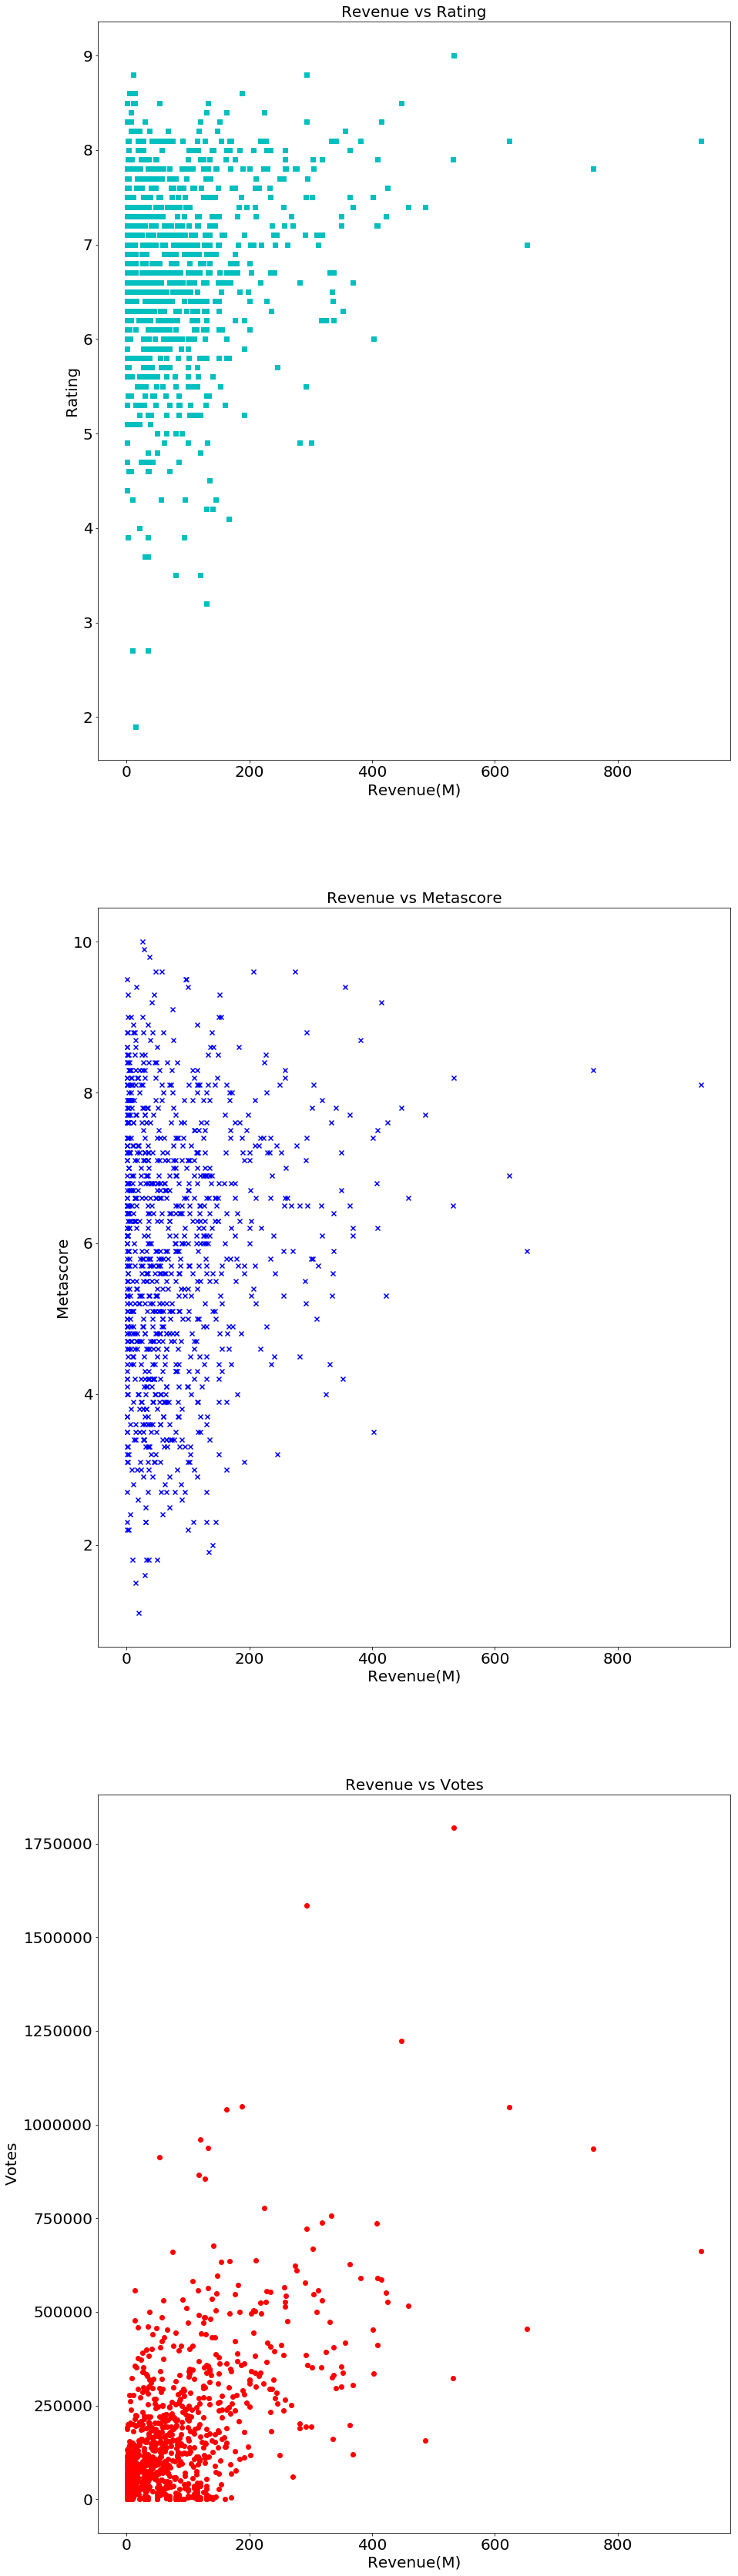

In [165]:
fig=plt.figure(figsize=(50,60))
ax=fig.add_subplot(331,xlabel='Revenue(M)',ylabel='Rating',title='Revenue vs Rating')
ax.scatter(rev,rat,color='c',marker='s')
for it in ([ax.title,ax.xaxis.label,ax.yaxis.label]+ax.get_xticklabels()+ax.get_yticklabels()):
    it.set_fontsize(20)
ax=fig.add_subplot(334,xlabel='Revenue(M)',ylabel='Metascore',title='Revenue vs Metascore')
ax.scatter(rev,met/10,color='b',marker='x')
for it in ([ax.title,ax.xaxis.label,ax.yaxis.label]+ax.get_xticklabels()+ax.get_yticklabels()):
    it.set_fontsize(20)
ax=fig.add_subplot(337,xlabel='Revenue(M)',ylabel='Votes',title='Revenue vs Votes')
ax.scatter(rev,(vot*1.0),color='r')
for it in([ax.title,ax.xaxis.label,ax.yaxis.label]+ax.get_xticklabels()+ax.get_yticklabels()):
    it.set_fontsize(20)

<h2 style=color:blue>Analyze data

> <h3 style=color:cyan>Build Models(Statistical analysis of data)

In [166]:
im['Rating(100)']=im['Rating']*10

In [167]:
im

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating(100)
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,81.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,70.0
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,73.0
3,4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,72.0
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,62.0
5,6,The Great Wall,"[Action, Adventure, Fantasy]",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,61.0
6,7,La La Land,"[Comedy, Drama, Music]",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,83.0
7,8,Mindhorn,[Comedy],A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,50.00,71.0,64.0
8,9,The Lost City of Z,"[Action, Adventure, Biography]","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,71.0
9,10,Passengers,"[Adventure, Drama, Romance]",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,70.0


In [168]:
im['Rating(100)'].corr(im['Metascore'])

0.6373596288450414

In [169]:
im['Rating(100)'].corr(im['Votes'])

0.5115373197657557

In [170]:
im['Metascore'].corr(im['Votes'])

0.31213363775257236

In [171]:
im['Metascore'].corr(im['Revenue (Millions)'])

0.11961844604886729

In [172]:
im['Votes'].corr(im['Revenue (Millions)'])

0.6012364015088629

In [173]:
im['Rating(100)'].corr(im['Revenue (Millions)'])

0.1847505267040719

In [174]:
im['Votes'].describe()

count    1.000000e+03
mean     1.698083e+05
std      1.887626e+05
min      6.100000e+01
25%      3.630900e+04
50%      1.107990e+05
75%      2.399098e+05
max      1.791916e+06
Name: Votes, dtype: float64

In [175]:
avgg=((im['Rating(100)']+239909)+(im['Metascore']+239909)+im['Votes'])//2
avgg.corr(im['Revenue (Millions)'])

0.6012241733269497

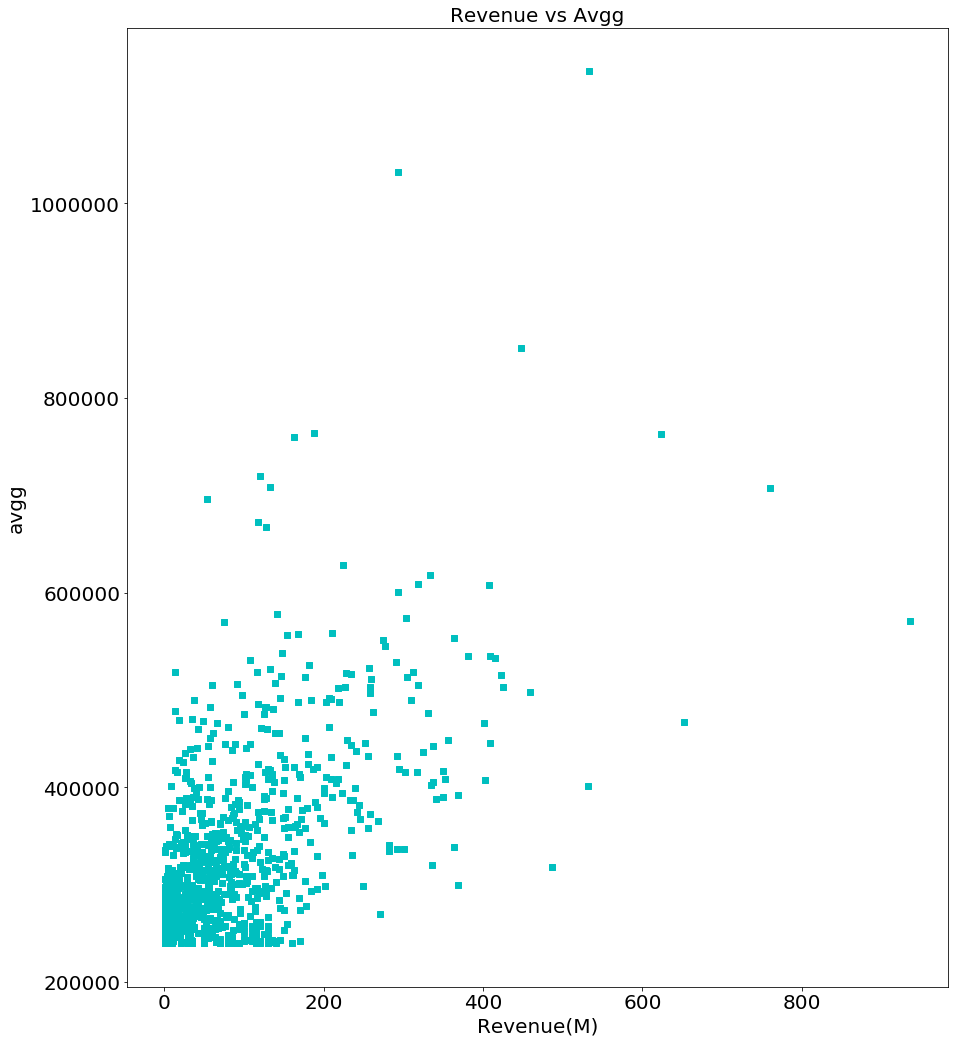

In [176]:
fig=plt.figure(figsize=(50,60))
ax=fig.add_subplot(331,xlabel='Revenue(M)',ylabel='avgg',title='Revenue vs Avgg')
ax.scatter(rev,avgg,color='c',marker='s')
for it in ([ax.title,ax.xaxis.label,ax.yaxis.label]+ax.get_xticklabels()+ax.get_yticklabels()):
    it.set_fontsize(20)

In [178]:
x=np.array(avgg).reshape(-1,1)
yt=im['Revenue (Millions)']
y=[]
cl=[]
for i in yt:
    if i <100:
        y.append('Flop if Budget > 70M .Else Average')
        cl.append(1)
    elif i>=100 and i<250:
        y.append('Average if Budget < 150M.Else Flop')
        cl.append(2)
    elif i>=250 and i<400:
        y.append('Good if Budget > 150M .Else Block buster')
        cl.append(3)
    elif i>=400 and i<600:
        y.append('Block buster')
        cl.append(4)
    elif i>=600 and i<1500:
        y.append('Could be a top grosser of the year')
        cl.append(5)
    elif i>=1500:
        y.append('Could be a all time highest grosser')
        cl.append(6)
y=np.array(y).reshape(-1,1)

<h1 style=color:green> Using Decision trees for Average (Votes,Rating and Metascore) and Revenue

In [179]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [180]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=297)

In [181]:
re_cl=DecisionTreeClassifier(max_leaf_nodes=13,random_state=0)

In [182]:
x_train=np.array(x_train).reshape(-1,1)
re_cl.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=13,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [183]:
pred=re_cl.predict(x_test)

In [184]:
accuracy_score(y_true = y_test, y_pred = pred)

0.6733333333333333

<h1 style=color:magenta> Predicting the example 

<h3>Movie:Justice league.</h3>
Metascore=45<br>
Rating=6.6<br>
Votes=288710<br>
Budget=300M<br>
Revenue=657.9M

In [187]:
metascore=45
rating=6.6 *10#making rating in scale of 0 - 100
votes=288710
revenue=657.9

In [193]:
samp_avgg=pd.Series((metascore+239909) + (rating+239909) +votes)
samp_avgg=pd.DataFrame(samp_avgg)

In [194]:
pred=re_cl.predict(samp_avgg)

In [195]:
pred

array(['Average if Budget < 150M.Else Flop'], dtype='<U40')

<h3>As Budget of the film is 300M (>150M) then the film is considered as <p style=color:red>FLOP</p></h3>

<h3> Refer</h3>

<href https://www.rottentomatoes.com/m/justice_league_2017/>